In [11]:
%load_ext lab_black

In [12]:
import os
import sys

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import xarray as xr
from cmcrameri import cm
from hydra import compose, initialize
from omegaconf import OmegaConf
from scipy.optimize import differential_evolution
from sklearn import preprocessing

sys.path.append("../")
from cfg.convert_cfg_to_yaml import save_myyaml_from_mycfg
from Data import Data_eval
from include.loss import pixel_weighted_cross_entropy
import model_eval

import matplotlib_functions as mympf

mympf.setMatplotlibParam()
plt.viridis()

dir_res = "/cerea_raid/users/dumontj/dev/coco2/dl/res"

2023-09-21 13:56:01.468491: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<Figure size 1920x1440 with 0 Axes>

# TUROW

In [13]:
# Turow
name_case = "/cerea_raid/users/dumontj/dev/coco2/dl/res/segmentation/seg_tur"

### 2km_Tur/train_dataset

In [14]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Tur/train_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (6289, 64, 64, 1)


2023-09-21 13:56:17.408426: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-21 13:56:17.940388: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14708 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5


In [15]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

2023-09-21 13:56:21.846509: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-09-21 13:56:22.432726: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


197/197 [==============================] - 5s 9ms/step
0.55646336


In [16]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")

197/197 [==============================] - 1s 7ms/step


### 2km_Tur/valid_dataset

In [17]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Tur/valid_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (1152, 64, 64, 1)


In [18]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

36/36 [==============================] - 0s 6ms/step
0.5707518


In [19]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")
print(data.path_eval_nc)

36/36 [==============================] - 0s 6ms/step
/libre/dumontj/coco2/dl-input/2km_Tur/valid_dataset.nc


### 2km_forTur_2/train_dataset

In [20]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_forTur_2/train_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (25152, 64, 64, 1)


In [21]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

2023-09-21 13:58:50.731876: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2060451840 exceeds 10% of free system memory.
2023-09-21 13:58:52.172188: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2060451840 exceeds 10% of free system memory.


786/786 [==============================] - 5s 7ms/step
0.3278101


In [22]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")
print(data.path_eval_nc)

2023-09-21 14:02:19.701960: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2060451840 exceeds 10% of free system memory.
2023-09-21 14:02:21.136174: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2060451840 exceeds 10% of free system memory.


786/786 [==============================] - 5s 7ms/step
/libre/dumontj/coco2/dl-input/2km_forTur_2/train_dataset.nc


### 2km_forTur_2/valid_dataset

In [23]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_forTur_2/valid_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (4608, 64, 64, 1)


In [24]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

144/144 [==============================] - 1s 7ms/step
0.34326625


In [25]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")
print(data.path_eval_nc)

144/144 [==============================] - 1s 6ms/step
/libre/dumontj/coco2/dl-input/2km_forTur_2/valid_dataset.nc


### check

In [26]:
wbce = model_eval.get_wbce_model_on_data(model, data)
print(np.mean(wbce))

144/144 [==============================] - 1s 6ms/step
0.13335261


<Figure size 1920x1440 with 0 Axes>

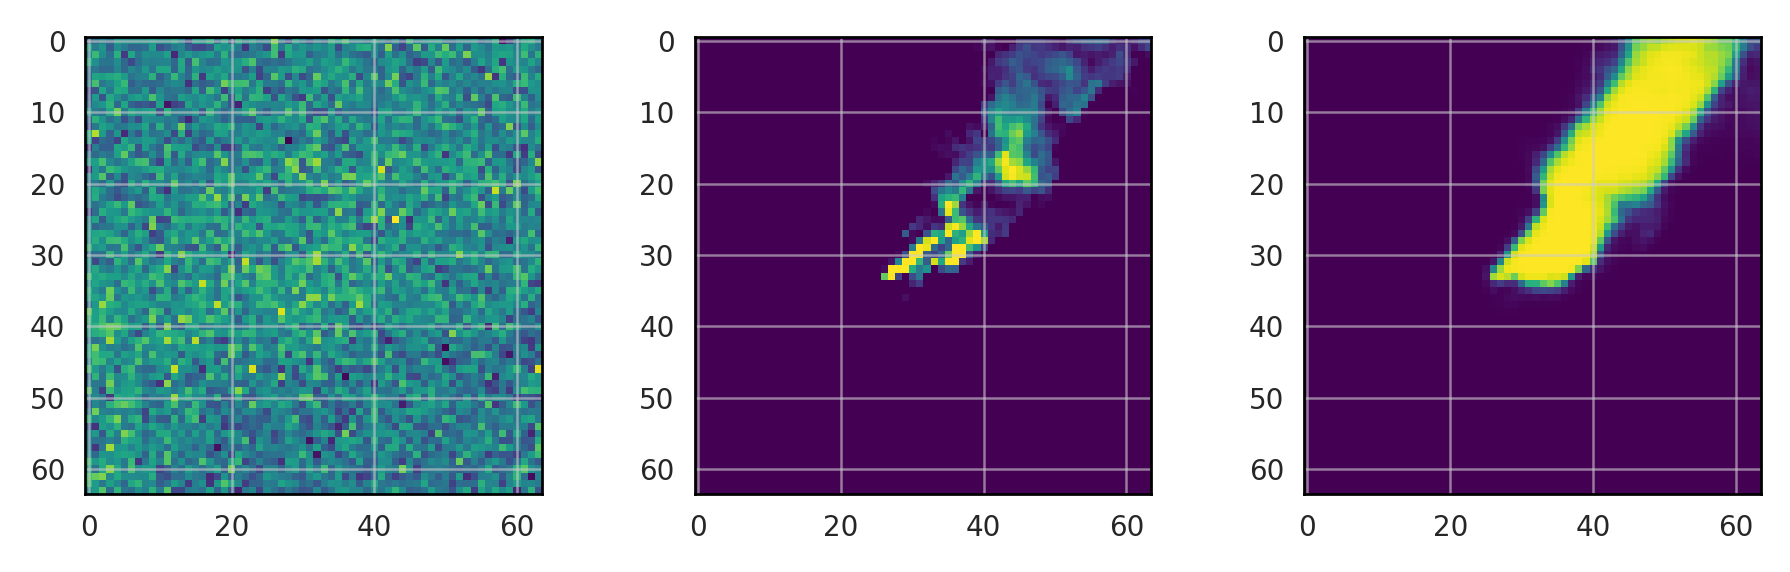

In [27]:
idx = np.random.randint(0, 500)
mympf.setMatplotlibParam()
plt.viridis()
axs = mympf.set_figure_axs(
    1,
    3,
    wratio=0.35,
    hratio=0.75,
    pad_w_ext_left=0.25,
    pad_w_ext_right=0.25,
    pad_w_int=0.001,
    pad_h_ext=0.2,
    pad_h_int=0.15,
)
axs[0].imshow(np.squeeze(data.x.eval[idx, :, :, 0]))
axs[1].imshow(np.squeeze(data.y.eval[idx]))
axs[2].imshow(np.squeeze(ds["seg_pred_no2"].values[idx]))

nwbce: 0.1972728967666626
idx: 539
origin: smart_2km_Ber_64
time: 2015-12-06T23:00:00.000000000
emiss: [ 9.88447 16.74069 20.29463]

nwbce: 0.03711690753698349
idx: 2233
origin: smart_2km_Opo_64
time: 2015-11-21T03:00:00.000000000
emiss: [5.435685 5.288757 6.921497]

nwbce: 0.12796606123447418
idx: 1761
origin: smart_2km_Opo_64
time: 2015-01-21T19:00:00.000000000
emiss: [ 9.877705 10.07147  10.65239 ]



<Figure size 1920x1440 with 0 Axes>

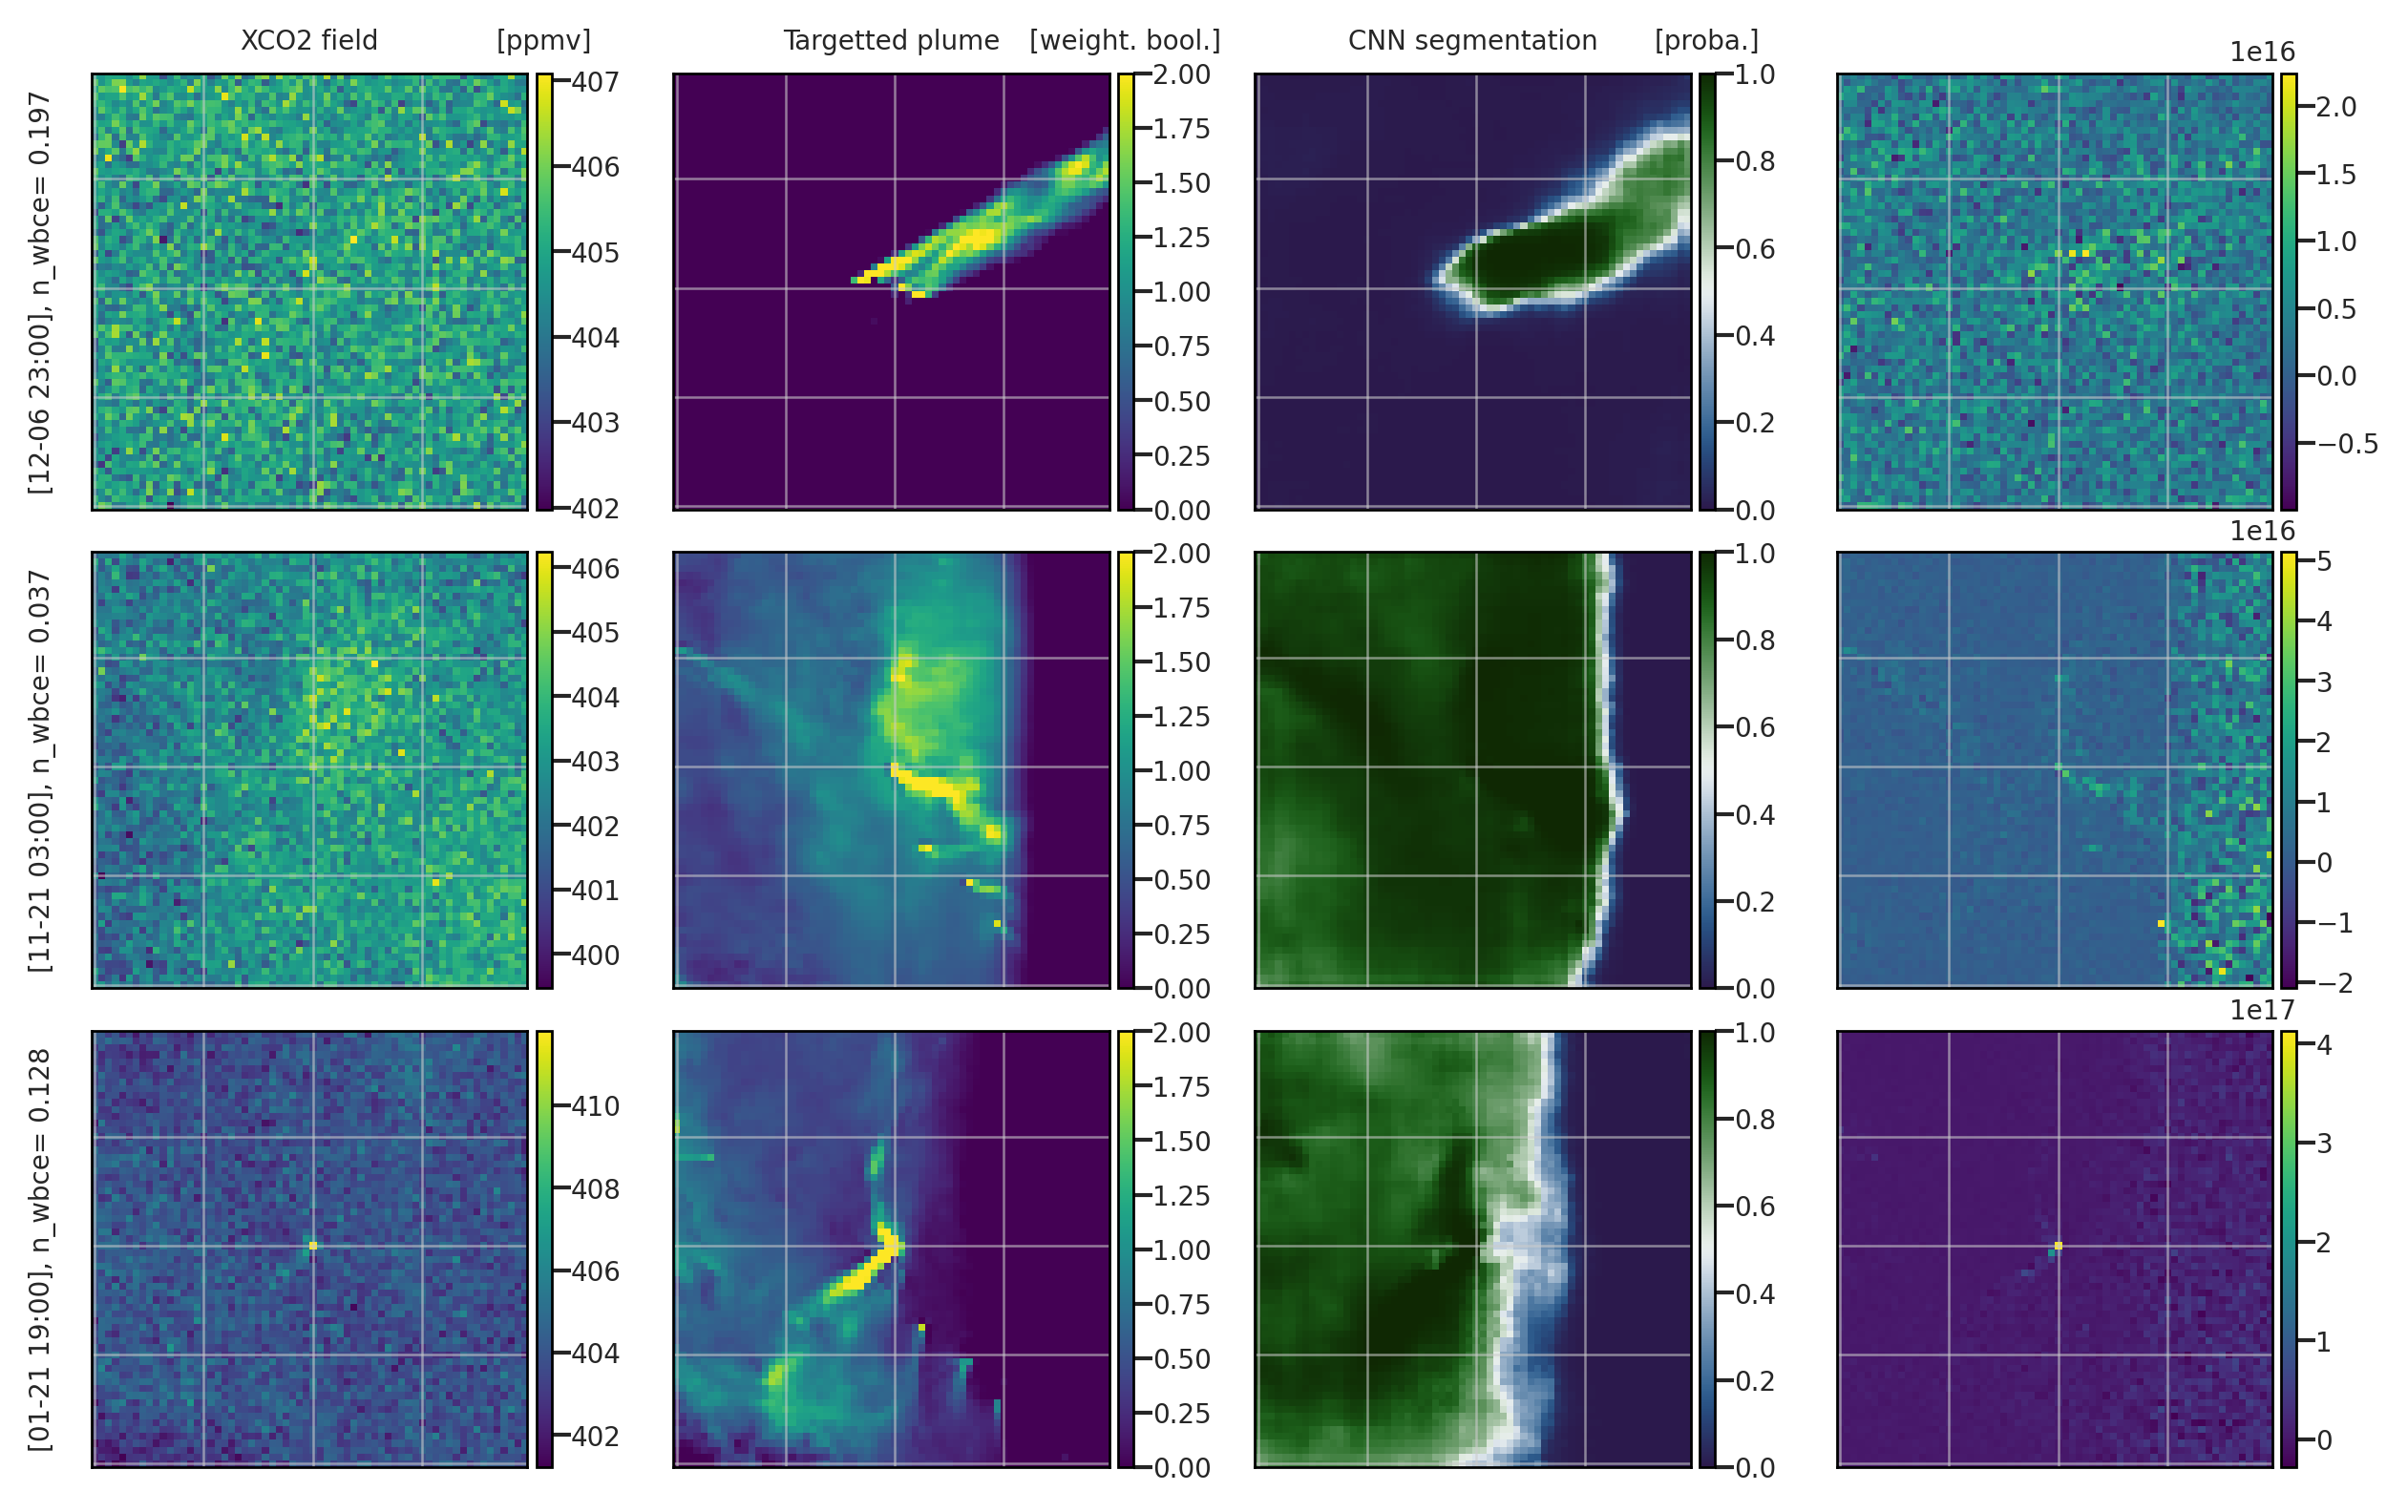

In [28]:
model_eval.plot_segmentation_examples(data, nwbce, model, no2=True)

# LIPPENDORF

In [3]:
name_case = "/cerea_raid/users/dumontj/dev/coco2/dl/res/segmentation/seg_lip"

### 2km_Lip/train_dataset

In [4]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Lip/train_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (6289, 64, 64, 1)


2023-09-21 13:43:06.122840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-21 13:43:06.647814: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14708 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5


In [5]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

2023-09-21 13:43:09.433089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-09-21 13:43:10.020127: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


197/197 [==============================] - 7s 9ms/step
2.6645303


In [6]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")

197/197 [==============================] - 1s 7ms/step


### 2km_Lip/valid_dataset

In [7]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Lip/valid_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (1152, 64, 64, 1)


In [8]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

36/36 [==============================] - 0s 6ms/step
2.8494177


In [9]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")
print(data.path_eval_nc)

36/36 [==============================] - 0s 6ms/step
/libre/dumontj/coco2/dl-input/2km_Lip/valid_dataset.nc


### 2km_forLip_2/train_dataset

In [10]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_forLip_2/train_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (25152, 64, 64, 1)


In [11]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

2023-09-21 13:45:44.443520: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2060451840 exceeds 10% of free system memory.
2023-09-21 13:45:45.840217: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2060451840 exceeds 10% of free system memory.


786/786 [==============================] - 6s 7ms/step
0.31715196


In [12]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")
print(data.path_eval_nc)

2023-09-21 13:49:47.587174: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2060451840 exceeds 10% of free system memory.
2023-09-21 13:49:49.053329: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2060451840 exceeds 10% of free system memory.


786/786 [==============================] - 5s 7ms/step
/libre/dumontj/coco2/dl-input/2km_forLip_2/train_dataset.nc


### 2km_forLip_2/valid_dataset

In [13]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_forLip_2/valid_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (4608, 64, 64, 1)


In [14]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

144/144 [==============================] - 1s 6ms/step
0.3311274


In [15]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")
print(data.path_eval_nc)

144/144 [==============================] - 1s 7ms/step
/libre/dumontj/coco2/dl-input/2km_forLip_2/valid_dataset.nc


### check

nwbce: 2.387331962585449
idx: 574
origin: smart_2km_Lip_64
time: 2015-06-22T22:00:00.000000000
emiss: [13.35195 14.18705 14.46548]

nwbce: 3.6983025074005127
idx: 57
origin: smart_2km_Lip_64
time: 2015-01-21T09:00:00.000000000
emiss: [24.11242 21.34659 15.8119 ]

nwbce: 1.2539931535720825
idx: 966
origin: smart_2km_Lip_64
time: 2015-11-06T06:00:00.000000000
emiss: [15.40222 12.38695 12.05181]



<Figure size 1920x1440 with 0 Axes>

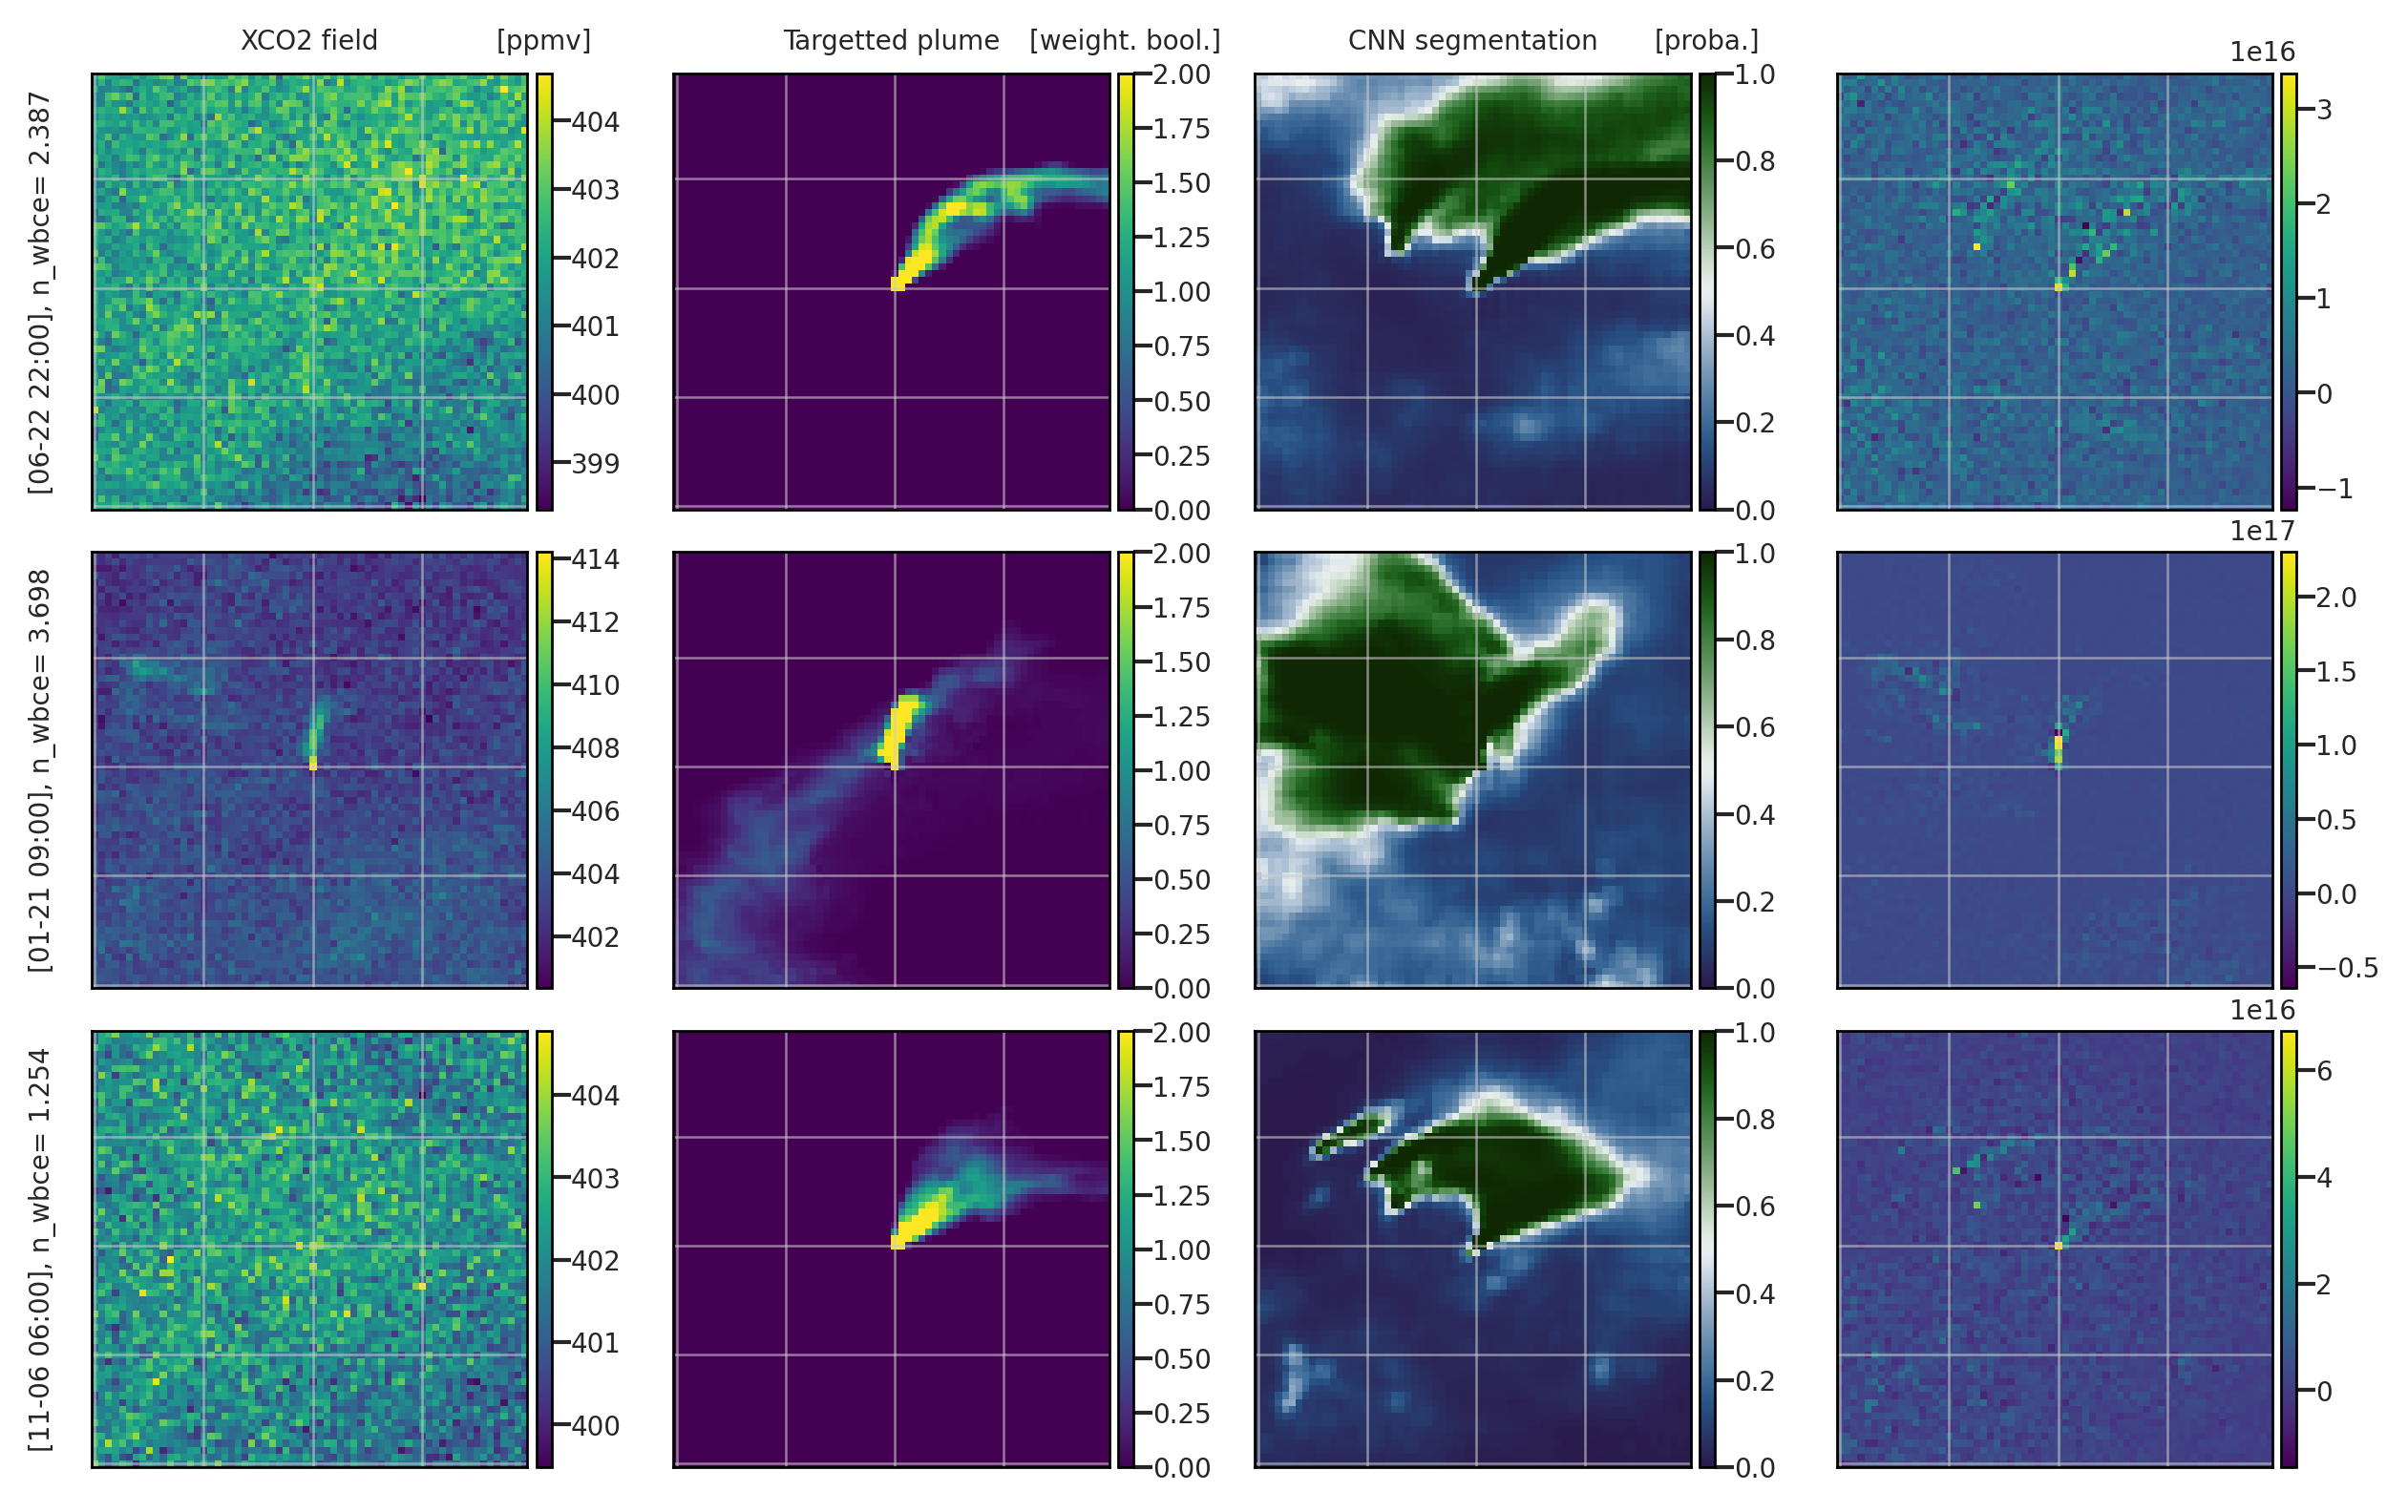

In [13]:
model_eval.plot_segmentation_examples(data, nwbce, model, no2=True)

# BOXBERG

In [29]:
name_case = "/cerea_raid/users/dumontj/dev/coco2/dl/res/segmentation/seg_box"

### 2km_Box/train_dataset

In [30]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Box/train_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (6289, 64, 64, 1)


In [31]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

197/197 [==============================] - 1s 7ms/step
0.24677446


In [32]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
print(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")

197/197 [==============================] - 1s 7ms/step
/libre/dumontj/coco2/dl-input/2km_Box/train_dataset.nc


### 2km_Box/valid_dataset

In [33]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Box/valid_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (1152, 64, 64, 1)


In [34]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

36/36 [==============================] - 0s 6ms/step
0.270814


In [35]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
print(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")

36/36 [==============================] - 0s 6ms/step
/libre/dumontj/coco2/dl-input/2km_Box/valid_dataset.nc


### 2km_forBox_2/train_dataset

In [36]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_forBox_2/train_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (25152, 64, 64, 1)


In [37]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

2023-09-21 14:08:01.973246: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 2060451840 exceeds 10% of free system memory.


786/786 [==============================] - 6s 7ms/step
0.34313017


In [38]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")
print(data.path_eval_nc)

786/786 [==============================] - 5s 7ms/step
/libre/dumontj/coco2/dl-input/2km_forBox_2/train_dataset.nc


### 2km_forBox_2/valid_dataset

In [39]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_forBox_2/valid_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (4608, 64, 64, 1)


In [40]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

144/144 [==============================] - 1s 6ms/step
0.36888674


In [41]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")
print(data.path_eval_nc)

144/144 [==============================] - 1s 6ms/step
/libre/dumontj/coco2/dl-input/2km_forBox_2/valid_dataset.nc


### 2km_forBox_4/train_dataset

In [42]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_forBox_4/train_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (15720, 64, 64, 1)


In [43]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

492/492 [==============================] - 4s 7ms/step
0.31125084


In [44]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")
print(data.path_eval_nc)

492/492 [==============================] - 3s 7ms/step
/libre/dumontj/coco2/dl-input/2km_forBox_4/train_dataset.nc


### 2km_forBox_4/valid_dataset

In [45]:
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_forBox_4/valid_dataset.nc"

data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (2880, 64, 64, 1)


In [46]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

90/90 [==============================] - 1s 6ms/step
0.33247507


In [47]:
x = tf.convert_to_tensor(data.x.eval, np.float32)
pred = tf.convert_to_tensor(model.predict(x), np.float32)

ds = data.ds
ds["seg_pred_no2"] = (["idx_img", "x", "y"], np.squeeze(pred.numpy()))
if os.path.exists(data.path_eval_nc):
    os.remove(data.path_eval_nc)
ds.to_netcdf(data.path_eval_nc, "a")
print(data.path_eval_nc)

90/90 [==============================] - 1s 6ms/step
/libre/dumontj/coco2/dl-input/2km_forBox_4/valid_dataset.nc


### check

nwbce: 0.11470349878072739
idx: 1119
origin: smart_2km_Opo_64
time: 2015-12-07T07:00:00.000000000
emiss: [11.08878   8.572829  6.895343]

nwbce: 0.23018021881580353
idx: 1590
origin: smart_2km_Lip_64
time: 2015-10-06T13:00:00.000000000
emiss: [18.5817  19.55089 19.7122 ]

nwbce: 0.09855907410383224
idx: 806
origin: smart_2km_Opo_64
time: 2015-05-22T05:00:00.000000000
emiss: [7.831065 5.80069  5.148092]



<Figure size 1920x1440 with 0 Axes>

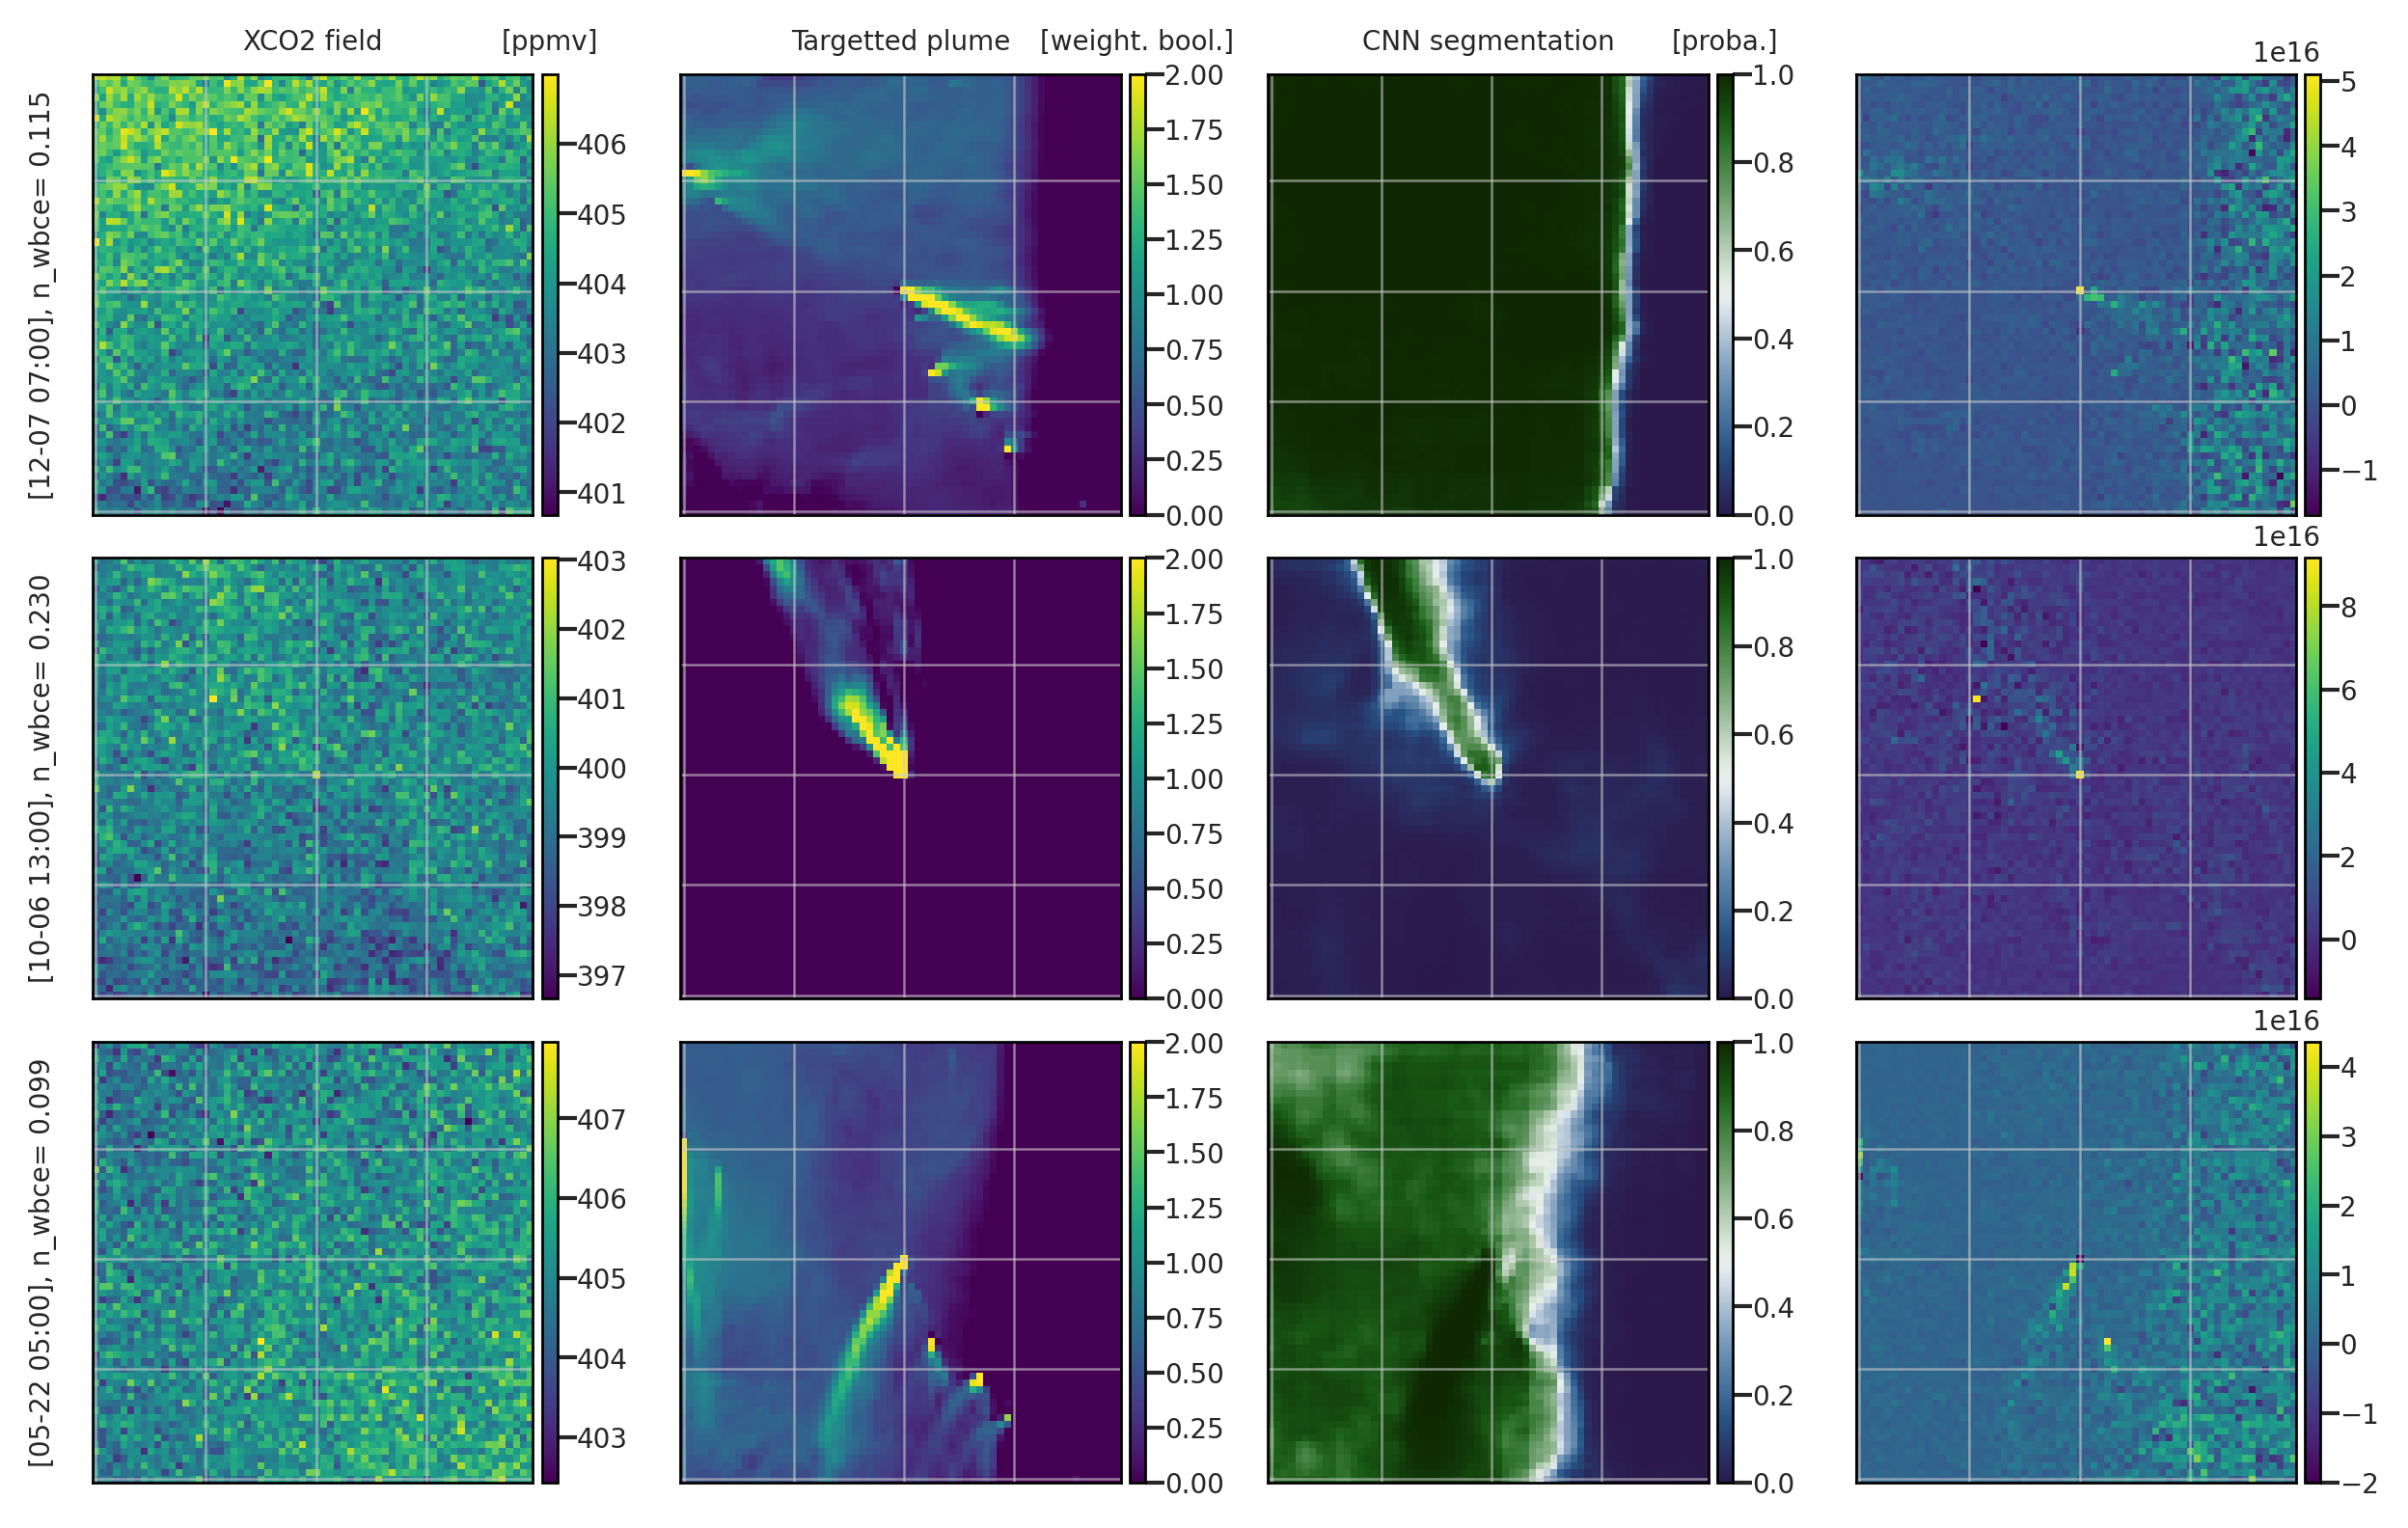

In [48]:
model_eval.plot_segmentation_examples(data, nwbce, model, no2=True)